In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Load Dataset

In [3]:
healthy_corals = "/content/drive/MyDrive/dataset/coral_disease/healthy_corals"
bleached_corals = "/content/drive/MyDrive/dataset/coral_disease/bleached_corals"

## Data Preparation

In [4]:
directory_list = [healthy_corals, bleached_corals]
classes = ['Healthy','Bleached']

filepaths = []
labels = []

In [5]:
for i,j in zip(directory_list, classes):
    filelist = os.listdir(i)
    for name in filelist:
        filepath = os.path.join(i, name)
        print(filepath)
        filepaths.append(filepath)
        labels.append(j)

/content/drive/MyDrive/dataset/coral_disease/healthy_corals/1063594275_418daec726_b_0_2088.jpg
/content/drive/MyDrive/dataset/coral_disease/healthy_corals/11335716606_517eb63e0d_b_0_8398.jpg
/content/drive/MyDrive/dataset/coral_disease/healthy_corals/12678410645_623fc2f1d0_b_0_2742.jpg
/content/drive/MyDrive/dataset/coral_disease/healthy_corals/12618485353_670ca1b648_o_0_3923.jpg
/content/drive/MyDrive/dataset/coral_disease/healthy_corals/10167343533_ea141f7e70_b_0_5391.jpg
/content/drive/MyDrive/dataset/coral_disease/healthy_corals/12585421735_ebb6521075_o_0_8477.jpg
/content/drive/MyDrive/dataset/coral_disease/healthy_corals/10493549203_b71d6746b0_o_0_1508.jpg
/content/drive/MyDrive/dataset/coral_disease/healthy_corals/10472474274_1f73391912_o_0_7406.jpg
/content/drive/MyDrive/dataset/coral_disease/healthy_corals/10493371746_61da3099a1_o_0_7809.jpg
/content/drive/MyDrive/dataset/coral_disease/healthy_corals/10160888014_be7c71167c_o_0_1341.jpg
/content/drive/MyDrive/dataset/coral_dise

In [6]:
print('filepaths:', len(filepaths), 'labels:', len(labels))

filepaths: 923 labels: 923


In [7]:
file_content=pd.Series(filepaths, name='filepaths') # membuat kolom filepaths
label_content=pd.Series(labels, name='labels') #membuat kolom labels

df=pd.concat([file_content,label_content], axis=1) #menggabungkan menjadi 2kolom diatas menjadi table
df=pd.DataFrame(np.array(df).reshape(len(filepaths),2), columns = ['filepaths', 'labels']) #membuat menjadi table

In [8]:
df #memanggil table

,filepaths,labels
0,/content/drive/MyDrive/dataset/coral_disease/h...,Healthy
1,/content/drive/MyDrive/dataset/coral_disease/h...,Healthy
2,/content/drive/MyDrive/dataset/coral_disease/h...,Healthy
3,/content/drive/MyDrive/dataset/coral_disease/h...,Healthy
4,/content/drive/MyDrive/dataset/coral_disease/h...,Healthy
...,...,...
918,/content/drive/MyDrive/dataset/coral_disease/b...,Bleached
919,/content/drive/MyDrive/dataset/coral_disease/b...,Bleached
920,/content/drive/MyDrive/dataset/coral_disease/b...,Bleached
921,/content/drive/MyDrive/dataset/coral_disease/b...,Bleached


## EDA

In [9]:
label_counts = df['labels'].value_counts() # Menghitung jumlah setiap label/target
print(label_counts)

labels
Bleached    485
Healthy     438
Name: count, dtype: int64


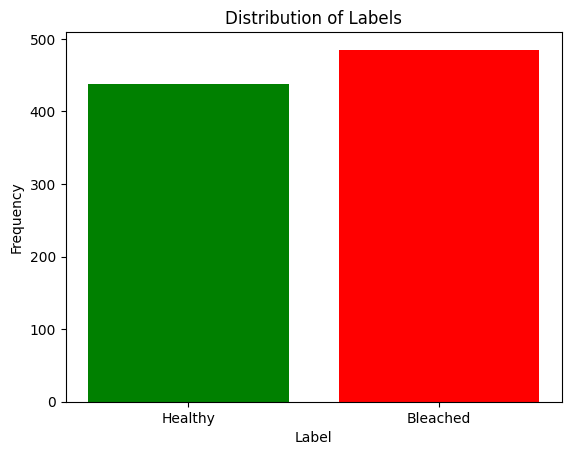

In [10]:
colors = ['green', 'red'] #memberikan warna pada grafik

#mengurutkan berdasarkan label/target
label_counts_ordered = label_counts.reindex(classes)

#menampilkan grafik batang
plt.bar(label_counts_ordered.index, label_counts_ordered.values, color=colors)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Distribution of Labels')
plt.show()

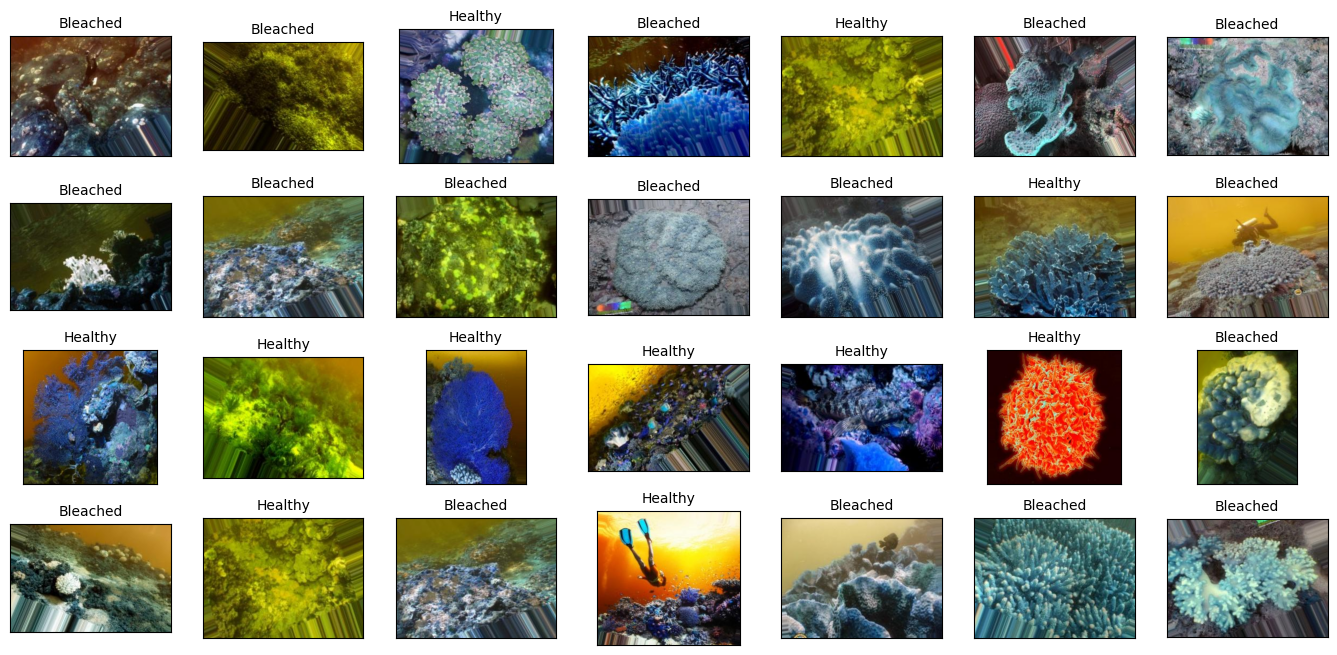

In [11]:
import cv2 # menggunakan library computer vision

# inisiasi untuk menampilkan data gambar
plt.figure(figsize=(17,8))
x1 = 4
x2 = 7
has = x1 * x2

# menampilkan data gambar
for i in range(has):
    random = np.random.randint(1,len(df))
    plt.subplot(x1,x2,i+1)
    image = cv2.imread(df.loc[random,"filepaths"])
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(df.loc[random, "labels"], size = 10)
    plt.xticks([])
    plt.yticks([])

## Augmentation Data

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (150, 150)
batch_size = 923

datagen = ImageDataGenerator(
    rotation_range=75,
    horizontal_flip=True,
    height_shift_range=0.1,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range = 0.1,
    fill_mode='nearest',
)

X, y = [], []

data_dir = '/content/drive/MyDrive/dataset/coral_disease/'
train_dataset = datagen.flow_from_directory(data_dir, target_size=img_size, batch_size=batch_size, shuffle=True)

X, y = next(train_dataset)

Found 923 images belonging to 2 classes.


## Split Data

In [13]:
from sklearn.model_selection import train_test_split
from collections import Counter

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)


print("Pembagian Data Training, Validation & Testing\n")

print("Train     \t",sorted(Counter(np.argmax(y_train, axis=1)).items()))
print("Validation\t",sorted(Counter(np.argmax(y_val, axis=1)).items()))
print("Test      \t",sorted(Counter(np.argmax(y_test, axis=1)).items()))

Pembagian Data Training, Validation & Testing

Train     	 [(np.int64(0), 392), (np.int64(1), 346)]
Validation	 [(np.int64(0), 77), (np.int64(1), 71)]
Test      	 [(np.int64(0), 16), (np.int64(1), 21)]


In [14]:
print("Banyak Sample Setiap Kelass:\t", sorted(Counter(np.argmax(y, axis=1)).items()))

print("Nama Kelas Pada Index:\t", train_dataset.class_indices)

Banyak Sample Setiap Kelass:	 [(np.int64(0), 485), (np.int64(1), 438)]
Nama Kelas Pada Index:	 {'bleached_corals': 0, 'healthy_corals': 1}


In [15]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (738, 150, 150, 3)
y_train shape: (738, 2)
X_test shape: (37, 150, 150, 3)
y_test shape: (37, 2)
